In [1]:
import math
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

def euler(x0, y0, dx, F, n):
    xs = [x0]
    ys = [y0]
    
    for i in range(1, n + 1):
        xi = xs[i-1] + dx
        xs.append(xi)
        yi = F(xs[i-1], ys[i-1]) * dx + ys[i-1]
        ys.append(yi)
    
    f = pd.DataFrame(index = xs)
    f['y'] = ys
    f.index.name = 'x'
    return f

def secondDegreeEuler(x0, y0, dx, F, F1, n):
    '''
    args:
      x0: initial x
      y0: initial y
      dx: step
      F: y'=F(x, y)
      F1: y^(2)=F1(x,y)
      
    '''
    xs = [x0]
    ys = [y0]
    
    for i in range(1, n + 1):
        xi = xs[i-1] + dx
        xs.append(xi)
        yi = (F1(xs[i-1], ys[i-1]) * dx ** 2) / 2 + F(xs[i-1], ys[i-1]) * dx + ys[i-1]
        ys.append(yi)
    
    f = pd.DataFrame(index = xs)
    f['y'] = ys
    f.index.name = 'x'
    return f

def fourthDegreeEuler(x0, y0, dx, F, F1, F2, F3, n):
    '''
    args:
      x0: initial x
      y0: initial y
      dx: step
      F: y'=F(x, y)
      F1: y''=F1(x,y)
      F2: y^(3)=F2(x, y)
      F3: y^(4)=F3(x, y)
    '''
    xs = [x0]
    ys = [y0]
    
    for i in range(1, n + 1):
        xi = xs[i-1] + dx
        xs.append(xi)
        yi = (F3(xs[i-1], ys[i-1]) * dx ** 4) / math.factorial(4) + (F2(xs[i-1], ys[i-1]) * dx ** 3) / math.factorial(3) + (F1(xs[i-1], ys[i-1]) * dx ** 2) / 2 + F(xs[i-1], ys[i-1]) * dx + ys[i-1]
        ys.append(yi)
    
    f = pd.DataFrame(index = xs)
    f['y'] = ys
    f.index.name = 'x'
    return f




'Solutions'

,Euler,2nd Degree Euler,4th Degree Euler,Real Solution
x,,,,
0.0,4.500000,4.500000,4.500000,4.500000
0.5,4.750000,4.687500,4.675781,4.675639
1.0,4.875000,4.679688,4.641327,4.640859
1.5,4.812500,4.354492,4.260312,4.259155
2.0,4.468750,3.513550,3.308015,3.305472
2.5,3.703125,1.834518,1.413993,1.408753
3.0,2.304688,-1.206408,-2.032402,-2.042768


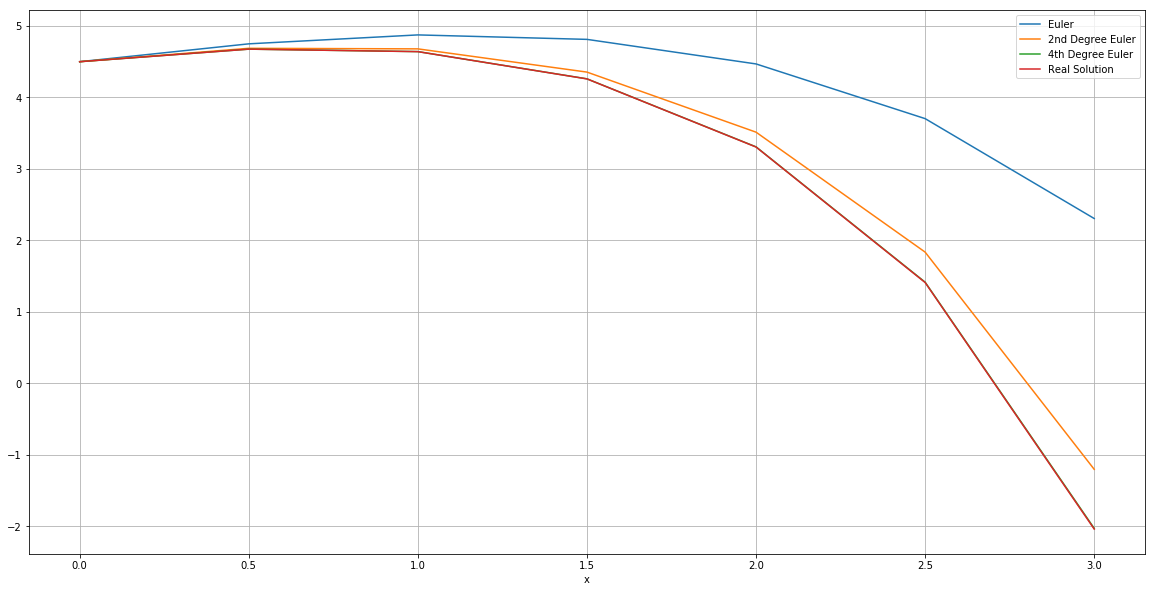

'Residuals'

,Euler,2nd Degree Euler,4th Degree Euler
x,,,
0.0,0.000000,0.000000,0.000000
0.5,0.074361,0.011861,0.000142
1.0,0.234141,0.038828,0.000468
1.5,0.553345,0.095337,0.001157
2.0,1.163278,0.208078,0.002543
2.5,2.294372,0.425765,0.005240
3.0,4.347456,0.836361,0.010367


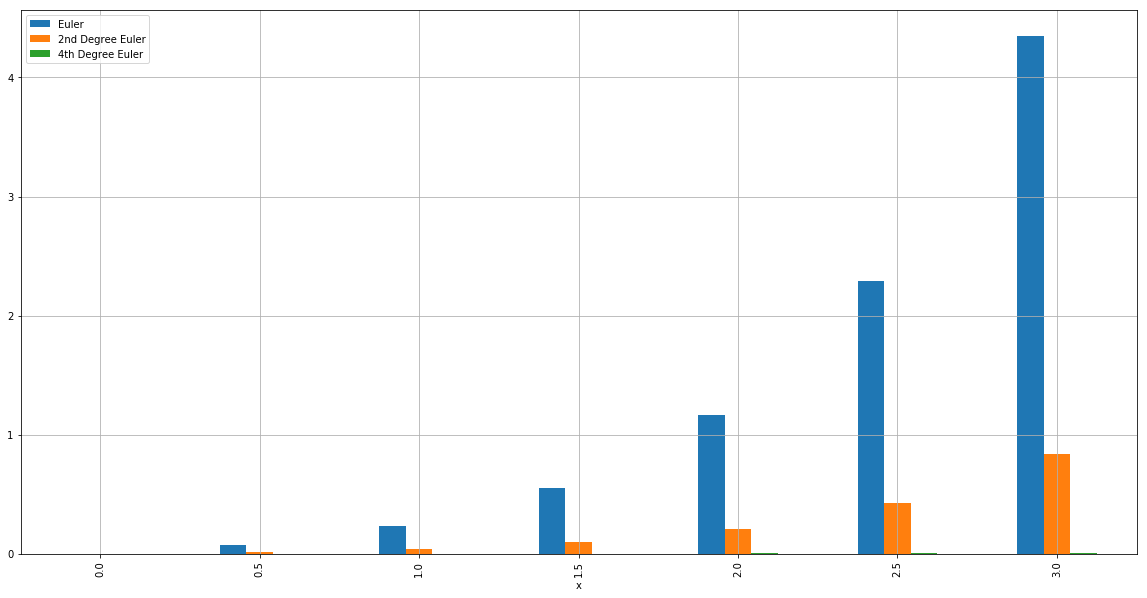

'MSE for each method'

,MSE
Euler,3.697753
2nd Degree Euler,0.133544
4th Degree Euler,0.000020


In [2]:
F = lambda x,y : y - x - 4
F1 = lambda x,y : y - x - 5
F2 = lambda x,y : y - x - 5
F3 = lambda x,y : y - x - 5
F4  = lambda x,y : y - x - 5

# Edit this here to change values.
n = 6
dx = 0.5
x0 = 0
y0 = 4.5

f = euler(x0, y0, dx, F, n)
f_second_deg = secondDegreeEuler(x0, y0, dx, F, F1, n)
f_fourth_deg = fourthDegreeEuler(x0, y0, dx, F, F1, F2, F3, n)
df = pd.DataFrame(index=f.index)
df.loc[:, 'Euler'] = f.loc[:, 'y']
df.loc[:, '2nd Degree Euler'] = f_second_deg.loc[:, 'y']
df.loc[:, '4th Degree Euler'] = f_fourth_deg.loc[:, 'y']
realy = []
for x in df.index:
    y = -0.5* math.exp(x) + x + 5
    realy.append(y)
df.loc[:, 'Real Solution'] = realy
residuals = pd.DataFrame(data=df.iloc[:, 0:3].values - df.iloc[:, [-1]].values, 
                         index=df.index, 
                         columns=['Euler', '2nd Degree Euler', '4th Degree Euler'])


display('Solutions')
display(df)
df.plot(kind = 'line', grid = True, figsize=(20, 10))
plt.show()

display('Residuals')
display(residuals)
residuals.plot(kind = 'bar', grid = True, figsize=(20, 10))
plt.show()

se= residuals ** 2
display('MSE for each method')
mse = se.mean(axis=0).to_frame()
mse.columns = ['MSE']
display(mse)